# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from scipy.stats.stats import pearsonr
from collections import defaultdict

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [5]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here
    Cluster_Distance=[]
    for pt in Data_points:
        distances=[]
        for centroid in Cluster_Centroids:
            if Distance_Type == 'Ecluidian':
                distances.append(np.linalg.norm(np.array(centroid) - np.array(pt)))
        Cluster_Distance.append(distances)
    return np.array(Cluster_Distance)


In [6]:
distances=GUC_Distance([(1,1),(2,1)],[(1,1),(2,1),(4,3),(5,4)], 'Ecluidian')
distances

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [3.60555128, 2.82842712],
       [5.        , 4.24264069]])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [29]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    # write code for intial cluster heads here
    # write your your loop
    Final_Cluster_Distance = []
    Cluster_Matrix = []
    Cluster_assignment = []
    rand = np.random.choice(len(Data_points), Number_of_Clusters, replace=False)
    Cluster_Centroids = []
    msd = {}
    distlists = {}
    cluster_points_ = defaultdict(list)
    cluster_centers_={}
    old_mean = 1
    new_mean = 0.1
    if type(Data_points[0]) != list or type(Data_points[0]) != int:
        for i in range(len(Data_points)) :
            Data_points[i]=tuple(Data_points[i])
    # for randomed centroids of clusters
    for x in rand:
        Cluster_Centroids.append(Data_points[x])
        msd[Data_points[x]] = []
        distlists[Data_points[x]] = []
        counter = 0
    while new_mean / old_mean < 0.9 or new_mean / old_mean > 1:

        counter = counter + 1
        old_mean = new_mean
        new_mean = 0
        Cluster_Distance = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        t=0
        # Assigning each
        for point in Cluster_Distance:
            index = np.where(point == min(point))
            cluster_centers_[index[0][0]]= Cluster_Centroids[index[0][0]]
            cluster_points_[index[0][0]].append(Data_points[t])
            t=t+1
            Cluster_assignment.append(index[0][0] + 1)
        x = 0
        data_lists = defaultdict(list)
        for cluster in Cluster_assignment:
            if type(Cluster_Centroids[0]) == list:
                distlists[tuple(Cluster_Centroids[cluster - 1])]
            else:
                distlists[Cluster_Centroids[cluster - 1]]
            Cluster_Distance[x][cluster - 1]
            if type(Cluster_Centroids[0]) == list:
                distlists[tuple(Cluster_Centroids[cluster - 1])].append(
                    Cluster_Distance[x][cluster - 1] * Cluster_Distance[x][cluster - 1])
            else:
                distlists[Cluster_Centroids[cluster - 1]].append(
                    Cluster_Distance[x][cluster - 1] * Cluster_Distance[x][cluster - 1])
            if type(Cluster_Centroids[0]) == list:
               data_lists[tuple(Cluster_Centroids[cluster - 1])].append(Data_points[x])
            else:
                data_lists[Cluster_Centroids[cluster - 1]].append(Data_points[x])
            x = x + 1
        k = 0
        for dist_list in distlists:
            length = len(distlists[dist_list])
            summation = sum(distlists[dist_list])
            if type(Cluster_Centroids[0]) == list:
               msd[tuple(Cluster_Centroids[k])] = summation / length
            else :
                msd[Cluster_Centroids[k]] = summation / length
            new_mean = new_mean + summation / length
            k = k + 1
        data_lists = dict(data_lists)
        Cluster_Centroids = []
        for old_centroid in data_lists:
            listA = data_lists[old_centroid]
            if type(listA[0]) != int:
               summ = [0] * len(listA[0])
            else:
               summ = 0
            for element in listA:
                if type(listA[0]) != int:
                   leg = len(element)
                   y = 0
                   while y < leg:
                       summ[y] = summ[y] + element[y]
                       y = y + 1
                else:
                    summ=summ+element
            final_sum = []
            if type(listA[0]) != int:
               for elemen in summ:
                  final_sum.append(elemen / len(listA))
            else:
                final_sum.append(summ / len(listA))
            new_centroid = final_sum
            Cluster_Centroids.append(new_centroid)
        Final_Cluster_Distance = Cluster_Distance
        Cluster_Matrix = distlists
        Cluster_Matrix = 0
        for m in msd:
            Cluster_Matrix=Cluster_Matrix+msd[m]
        distlists = {}
        for n in Cluster_Centroids:
            distlists[tuple(n)] = []
        labels_= Cluster_assignment
        Cluster_assignment = []
        msd = {}
    return [Final_Cluster_Distance, Cluster_Matrix, labels_, cluster_centers_, cluster_points_]

In [30]:
GUC_Kmean ( [(1,1),(2,1),(4,3),(5,4)], 2,  "Ecluidian" )

[array([[0.5       , 4.30116263],
        [0.5       , 3.53553391],
        [3.20156212, 0.70710678],
        [4.60977223, 0.70710678]]),
 0.7500000000000001,
 [1, 1, 2, 2],
 {0: [1.5, 1.0], 1: [4.5, 3.5]},
 defaultdict(list,
             {0: [(1, 1), (2, 1), (1, 1), (2, 1), (1, 1), (2, 1)],
              1: [(4, 3), (5, 4), (4, 3), (5, 4), (4, 3), (5, 4)]})]

In [31]:
GUC_Kmean ( [(1,1),(2,1),(4,3),(5,4)], 2,  "Ecluidian" )

[array([[0.5       , 4.30116263],
        [0.5       , 3.53553391],
        [3.20156212, 0.70710678],
        [4.60977223, 0.70710678]]),
 0.7500000000000001,
 [1, 1, 2, 2],
 {0: [1.5, 1.0], 1: [4.5, 3.5]},
 defaultdict(list,
             {0: [(1, 1), (2, 1), (1, 1), (2, 1), (1, 1), (2, 1)],
              1: [(4, 3), (5, 4), (4, 3), (5, 4), (4, 3), (5, 4)]})]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [33]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [34]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],number_of_clusters=0):
    color = 'brgcmyk'  #List colors b -> blue, r -> red
    alpha = 0.5  #color obaque, how obague my datapoints are
    s = 20 # size of point circle
    plt.gca().set_aspect('equal') # gca ==> get current access to make it symetric
    if number_of_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s) #
    else:
        for i in range(number_of_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [35]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def My_display_cluster(X,km=[],number_of_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    plt.gca().set_aspect('equal')
    if number_of_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(number_of_clusters):
            for point in km[4][i]:
                plt.scatter(point[0], point[1], c = color[i],alpha = alpha,s=s)
            plt.scatter(km[3][i][0],km[3][i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

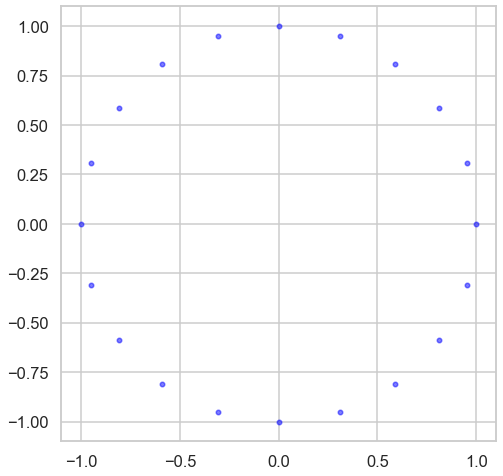

In [36]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

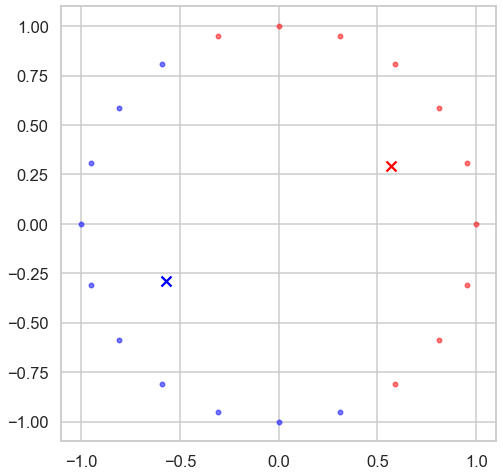

In [37]:
number_of_clusters = 2
km =KMeans(n_clusters = number_of_clusters, random_state=10, n_init = 1)
km.fit(X)
display_cluster(X, km, number_of_clusters)

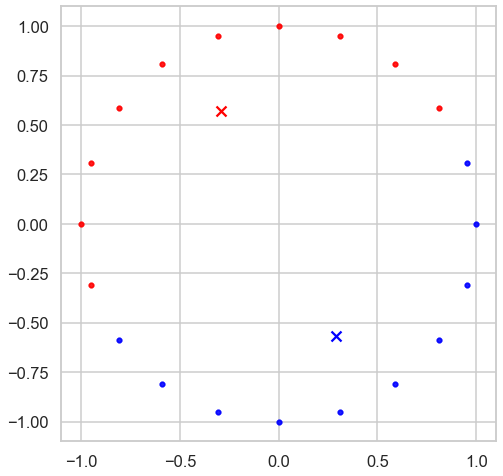

In [38]:
number_of_clusters = 2
km = GUC_Kmean(list(X), number_of_clusters, "Ecluidian")
My_display_cluster(X, km, number_of_clusters)

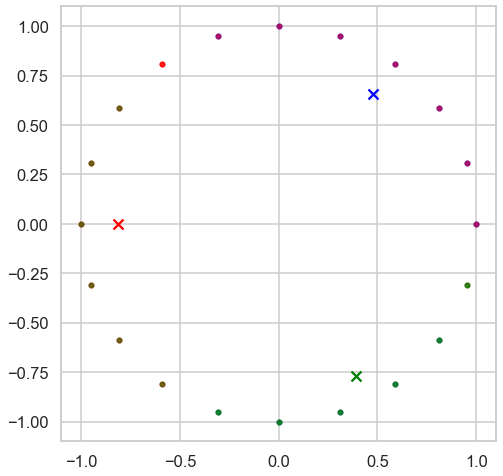

In [39]:
number_of_clusters = 3
km = GUC_Kmean(list(X), number_of_clusters, "Ecluidian")
My_display_cluster(X, km, number_of_clusters)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

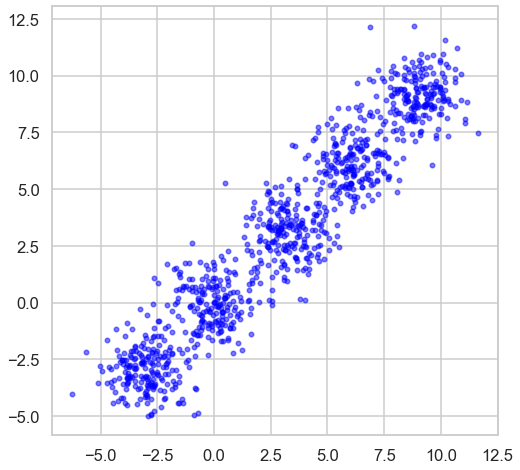

In [40]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

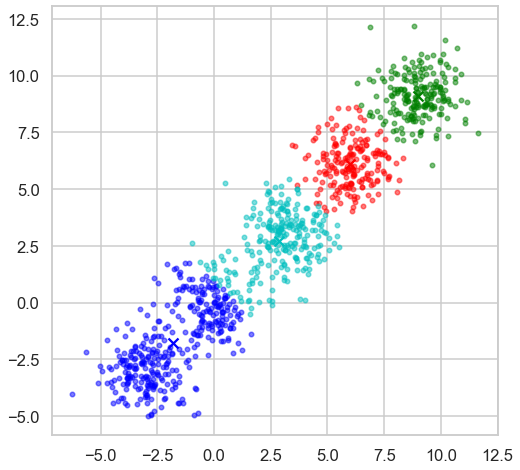

In [41]:
number_of_clusters = 4
km =KMeans(n_clusters = number_of_clusters, random_state=10, n_init = 1)
km.fit(X)
display_cluster(X, km, number_of_clusters)

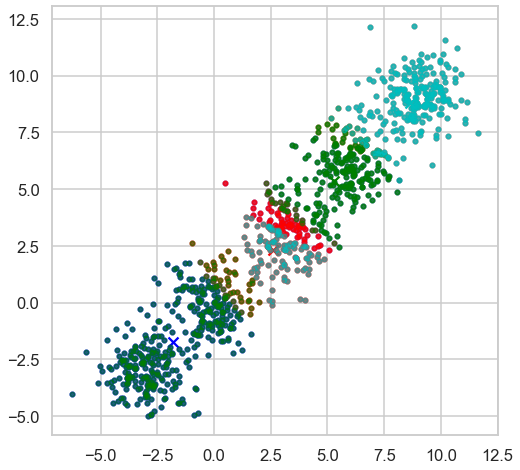

In [42]:
number_of_clusters = 4
km = GUC_Kmean(list(X), number_of_clusters, "Ecluidian")
My_display_cluster(X, km, number_of_clusters)

#### 2.3. Example 3 : moons Data Gen and display 

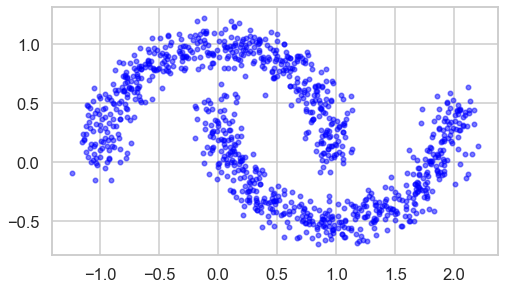

In [43]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

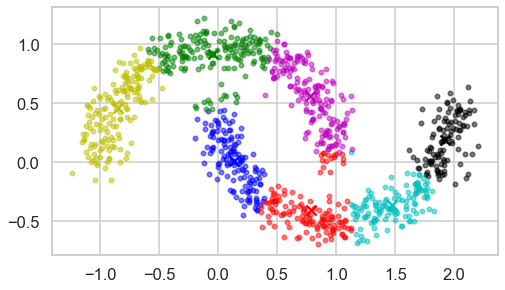

In [44]:
number_of_clusters = 7
km =KMeans(n_clusters = number_of_clusters, random_state=10, n_init = 1)
km.fit(X)
display_cluster(X, km, number_of_clusters)

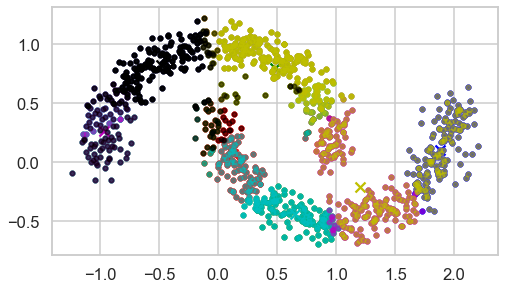

In [45]:
number_of_clusters = 7
km = GUC_Kmean(list(X), number_of_clusters, "Ecluidian")
My_display_cluster(X, km, number_of_clusters)

In [46]:
for u in range(len(X)) :
    X[u]=tuple(X[u])
print(X)

[[ 1.89169107 -0.01260579]
 [ 0.35693662 -0.18348392]
 [ 0.77708862  0.42930805]
 ...
 [ 0.0941229   0.27452108]
 [ 0.30651314  0.9722038 ]
 [-0.05109112  0.25883416]]


## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [47]:
def Example1():
    # figure size & background  
    plt.rcParams['figure.figsize'] = [8, 8]
    sns.set_style("whitegrid")
    sns.set_context("talk")
    angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
    X = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
    return X

In [48]:
def Example2():
    n_samples = 1000
    n_bins = 4
    centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9, 9)]
    X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                      centers=centers, shuffle=False, random_state=42)
    return X

In [49]:
def Example3():
    n_samples = 1000
    X, y = noisy_moons = make_moons(n_samples=n_samples, noise=.1)
    return X

IndexError: string index out of range

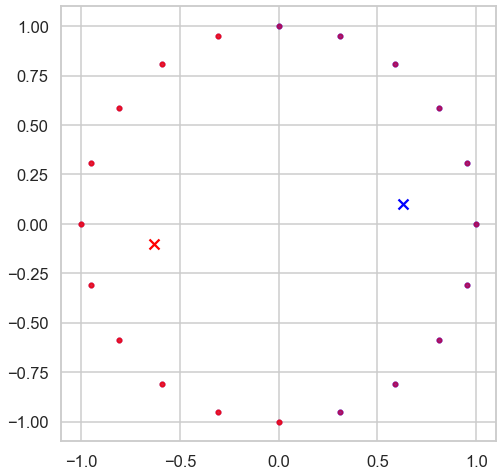

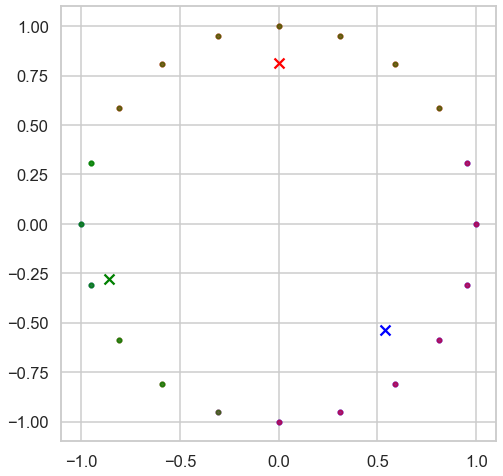

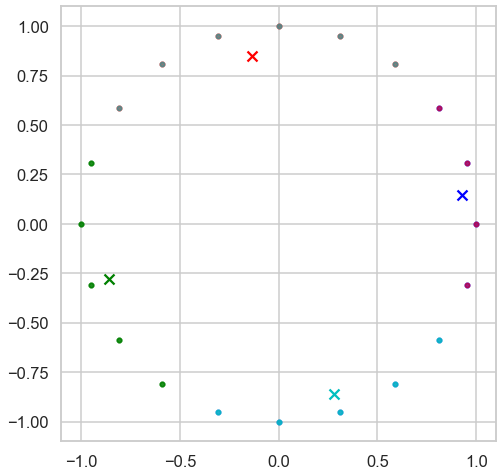

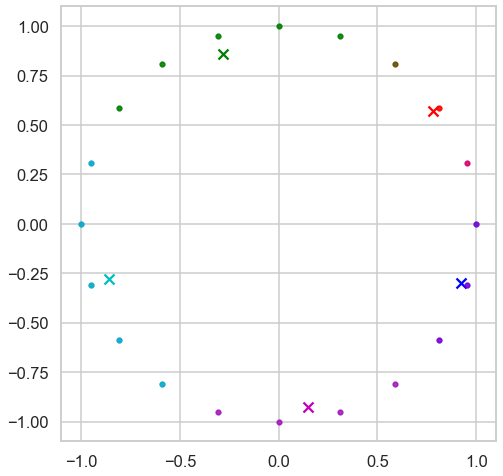

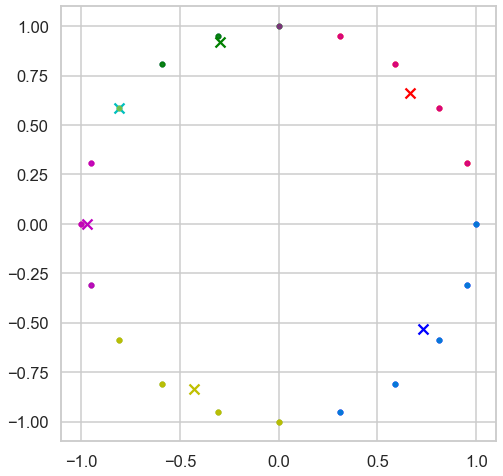

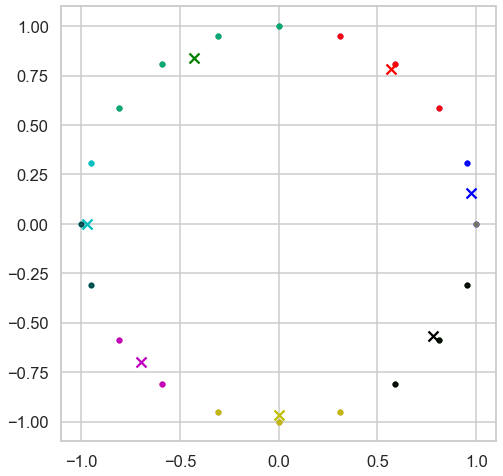

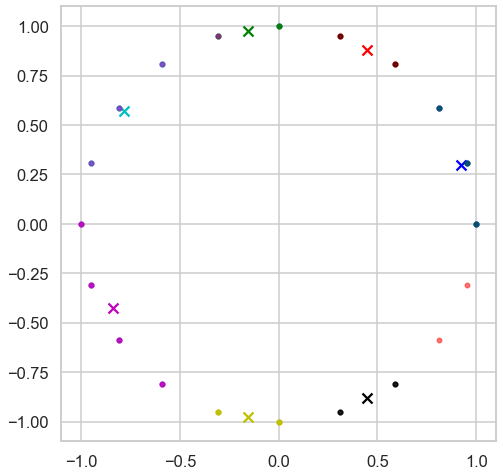

In [50]:
# Example_1
list_of_metric=[]
for number_of_clusters in range(2, 11):
    X=Example1()
    km = GUC_Kmean(list(X), number_of_clusters, "Ecluidian")
    list_of_metric.append(km[1])
    plt.figure() 
    My_display_cluster(X, km, number_of_clusters)

In [ ]:
# Example_2
list_of_metric=[]
for number_of_clusters in range(2, 11):
    X=Example2()
    km = GUC_Kmean(list(X), number_of_clusters, "Ecluidian")
    list_of_metric.append(km[1])
    plt.figure() 
    My_display_cluster(X, km, number_of_clusters)

In [ ]:
# Example_3
list_of_metric=[]
for number_of_clusters in range(2, 10):
    X=Example3()
    km = GUC_Kmean(list(X), number_of_clusters, "Ecluidian")
    list_of_metric.append(km[1])
    plt.figure() 
    My_display_cluster(X, km, number_of_clusters)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [55]:
from sklearn.decomposition import PCA
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.spatial import distance

In [57]:
data=pd.read_csv("Customer data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
# PCA is an unspuervised technique for multivariables
# used for set identification (Andrew ng ML course)
pca = PCA(2)
data = pca.fit_transform(data)
data

In [ ]:
#  segmentation of customers
list_of_metric=[]
for number_of_clusters in range(2, 10):
    km = GUC_Kmean(list(data), number_of_clusters, "Ecluidian")
    list_of_metric.append(km[1])
    plt.figure() 
    My_display_cluster(list(data), km, number_of_clusters)

In [ ]:
#  Customers are segmented using a variety of methods based on Pearson distance.
list_of_metric=[]
for number_of_clusters in range(2, 10):
    km = GUC_Kmean(list(data), number_of_clusters, "Pearson")
    list_of_metric.append(km[1])
    plt.figure() 
    My_display_cluster(list(data), km, number_of_clusters)